https://www.kaggle.com/datasets/mlippo/car-accidents-in-brazil-2017-2023

# Análise Exploratória

In [57]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('/content/accidents_2017_to_2023_portugues.csv')

In [59]:
df.head()

,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,...,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia
0,2017-01-01,domingo,01:45:00,RS,116.0,"34,9",VACARIA,Defeito Mecânico no Veículo,Colisão traseira,Com Vítimas Feridas,...,4,0,2,0,4,2,-28.50712,-50.94118,SPRF-RS,DEL05-RS
1,2017-01-01,domingo,01:00:00,PR,376.0,636,TIJUCAS DO SUL,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Fatais,...,0,0,1,0,0,2,-25.75400,-49.12660,SPRF-PR,DEL01-PR
2,2017-01-01,domingo,04:40:00,BA,101.0,65,ENTRE RIOS,Condutor Dormindo,Colisão frontal,Com Vítimas Fatais,...,1,1,2,0,2,2,-11.96180,-38.09530,SPRF-BA,DEL01-BA
3,2017-01-01,domingo,06:30:00,PA,316.0,"72,5",CASTANHAL,Falta de Atenção à Condução,Colisão lateral,Com Vítimas Fatais,...,0,0,3,0,0,3,-1.28998,-47.83483,SPRF-PA,DEL01-PA
4,2017-01-01,domingo,09:00:00,GO,20.0,"220,5",POSSE,Defeito na Via,Colisão com objeto estático,Com Vítimas Feridas,...,2,1,0,0,3,1,-14.14221,-46.32259,SPRF-DF,DEL02-DF


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463152 entries, 0 to 463151
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   data_inversa            463152 non-null  object 
 1   dia_semana              463152 non-null  object 
 2   horario                 463152 non-null  object 
 3   uf                      463152 non-null  object 
 4   br                      462162 non-null  float64
 5   km                      462162 non-null  object 
 6   municipio               463152 non-null  object 
 7   causa_acidente          463152 non-null  object 
 8   tipo_acidente           463112 non-null  object 
 9   classificacao_acidente  463152 non-null  object 
 10  fase_dia                463152 non-null  object 
 11  sentido_via             463152 non-null  object 
 12  condicao_metereologica  463152 non-null  object 
 13  tipo_pista              463152 non-null  object 
 14  tracado_via         

In [61]:
df.shape

(463152, 27)

In [62]:
df.isnull().sum()

,0
data_inversa,0
dia_semana,0
horario,0
uf,0
br,990
km,990
municipio,0
causa_acidente,0
tipo_acidente,40
classificacao_acidente,0


In [63]:
df.describe()

,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude
count,462162.000000,463152.000000,463152.000000,463152.000000,463152.000000,463152.000000,463152.000000,463152.000000,463152.000000,4.631520e+05,4.631520e+05
mean,213.432900,2.362373,0.079235,0.835469,0.259530,1.044070,0.144069,1.094999,1.645725,-2.343287e+03,-8.924977e+03
std,130.757607,1.924801,0.332169,1.075275,0.602814,1.502419,0.438168,1.205351,0.731394,1.519113e+06,5.903043e+06
min,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.033383e+09,-4.016764e+09
25%,101.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.533123e+01,-5.030294e+01
50%,163.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-2.042034e+01,-4.780831e+01
75%,324.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-1.282657e+01,-4.264249e+01
max,498.000000,80.000000,21.000000,61.000000,31.000000,73.000000,54.000000,66.000000,23.000000,1.630000e+02,7.170000e+02


In [64]:
df.columns

Index(['data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km', 'municipio',
       'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia',
       'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia'],
      dtype='object')

In [65]:
# entendendo os dados das pessoas
pessoas = df[['pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados']]
pessoas.head(10)

,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados
0,6,0,4,0,2,0
1,2,1,0,0,1,0
2,5,1,1,1,2,0
3,4,1,0,0,3,0
4,3,0,2,1,0,0
5,2,1,0,0,1,0
6,5,0,1,0,4,0
7,2,0,0,0,2,0
8,3,0,3,0,0,0
9,2,1,0,0,1,0


In [66]:
df['ignorados'].unique()

array([ 0,  1,  2,  3, 11,  4,  5,  6,  8,  9, 10,  7, 16, 15, 42, 19, 17,
       25, 54, 14, 12])

In [67]:
df.isnull().sum()

,0
data_inversa,0
dia_semana,0
horario,0
uf,0
br,990
km,990
municipio,0
causa_acidente,0
tipo_acidente,40
classificacao_acidente,0


In [68]:
print(df.dtypes)

data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                        float64
km                         object
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
pessoas                     int64
mortos                      int64
feridos_leves               int64
feridos_graves              int64
ilesos                      int64
ignorados                   int64
feridos                     int64
veiculos                    int64
latitude                  float64
longitude                 float64
regional                   object
delegacia                  object
dtype: object


In [69]:
verificando_negativos_inteiro = df.select_dtypes('int64')

In [70]:
verificando_negativos_inteiro[verificando_negativos_inteiro < 0].sum()

,0
pessoas,0.0
mortos,0.0
feridos_leves,0.0
feridos_graves,0.0
ilesos,0.0
ignorados,0.0
feridos,0.0
veiculos,0.0


## Pré-processamento e Visualização das Variáveis

In [71]:
df.dropna(inplace=True)

In [72]:
df['data_inversa'] = pd.to_datetime(df['data_inversa']).dt.year #transforma os dados para exibir apenas o ano
df['horario'] = pd.to_datetime(df['horario'], format='%H:%M:%S').dt.hour #apenas o horario padrão

In [73]:
df = df[df['data_inversa'] > 2019]

In [74]:
df['horario']

,horario
226455,5
226456,6
226457,6
226458,10
226459,12
...,...
463147,5
463148,19
463149,5
463150,9


In [75]:
intervalos = [0, 6, 12, 18, 24]
categorias = ['0h às 6h', '6h às 12h', '12h às 18h', '18h às 0h'] # fica melhor para a visualização, com os horarios de 6 em 6 horas

In [76]:
df['horario'] = pd.cut(df['horario'], bins=intervalos, labels=categorias, right=False)
# categoriza as horas diretamente em intervalos, sem a necessidade de uma função adicional

<ipython-input-76-1ccc703056ab>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0h às 6h', '6h às 12h', '6h às 12h', '6h às 12h', '12h às 18h', ..., '0h às 6h', '18h às 0h', '0h às 6h', '6h às 12h', '6h às 12h']
Length: 234907
Categories (4, object): ['0h às 6h' < '6h às 12h' < '12h às 18h' < '18h às 0h']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, 'horario'] = pd.cut(df['horario'], bins=intervalos, labels=categorias, right=False)


In [77]:
df['horario']

,horario
226455,0h às 6h
226456,6h às 12h
226457,6h às 12h
226458,6h às 12h
226459,12h às 18h
...,...
463147,0h às 6h
463148,18h às 0h
463149,0h às 6h
463150,6h às 12h


In [78]:
anlise_acidentes = df[['tipo_pista', 'horario', 'dia_semana', 'veiculos', 'fase_dia']]

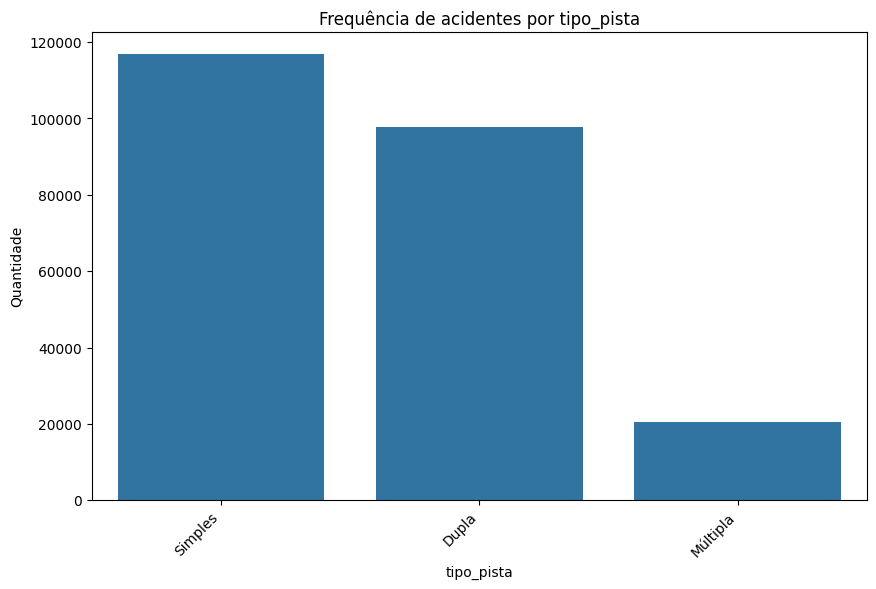

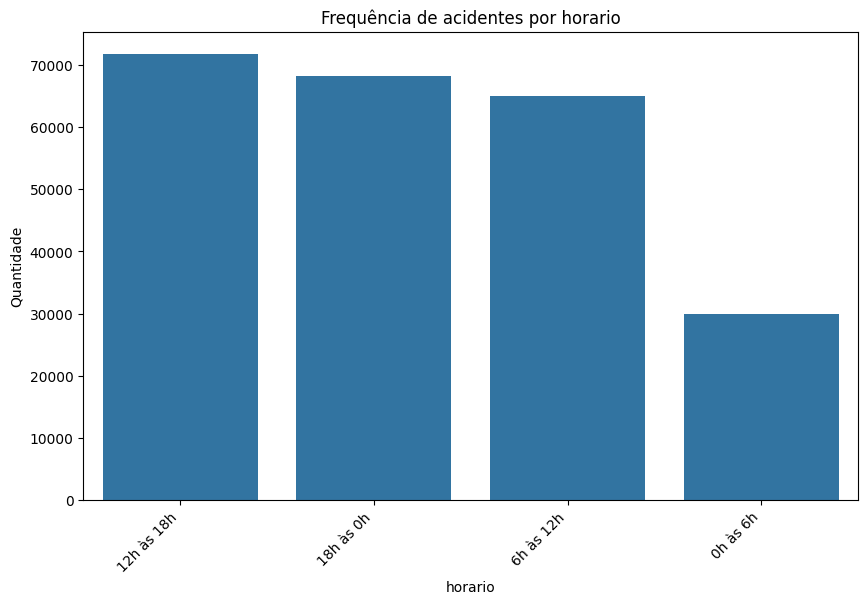

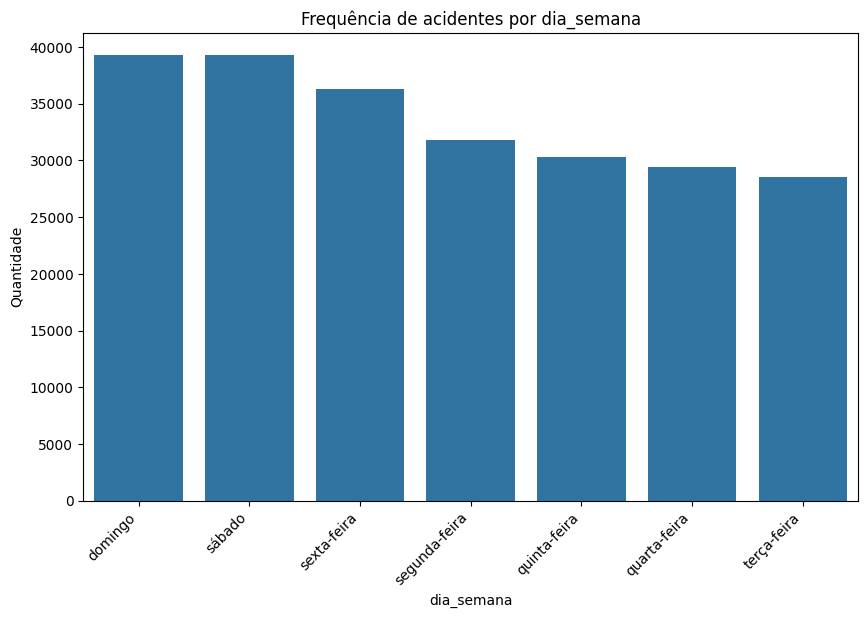

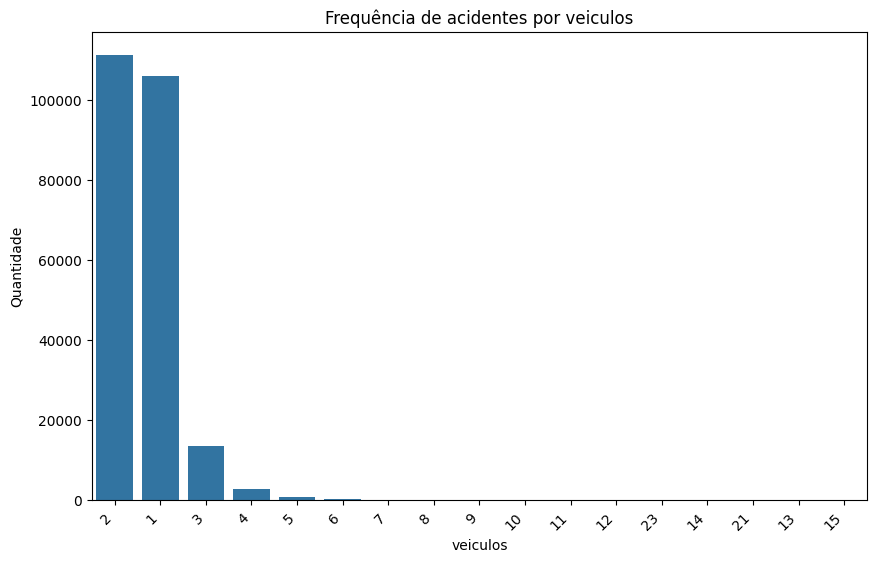

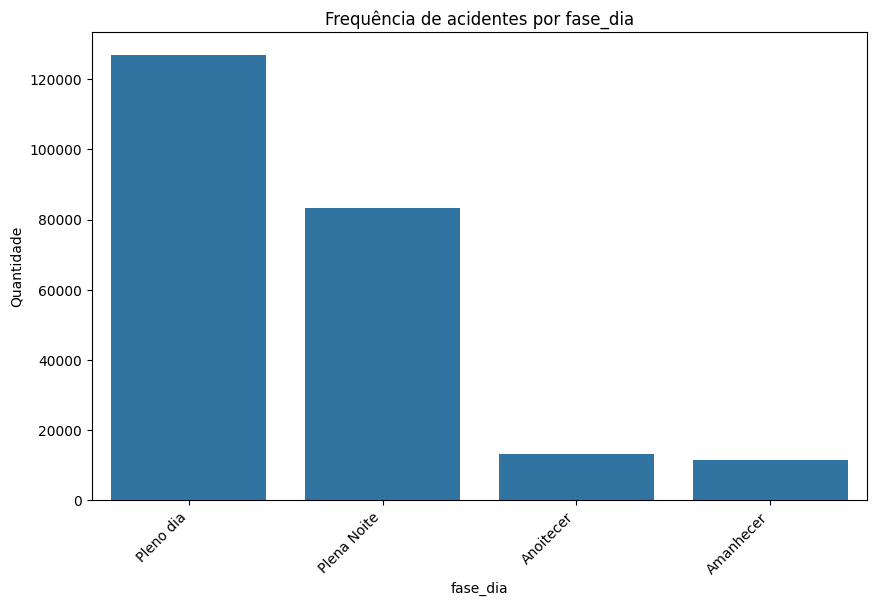

In [79]:
for col in anlise_acidentes:
    plt.figure(figsize=(10, 6))

    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Frequência de acidentes por {col}')
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.ylabel('Quantidade')
    plt.subplots_adjust(bottom=0.1)
    plt.show()

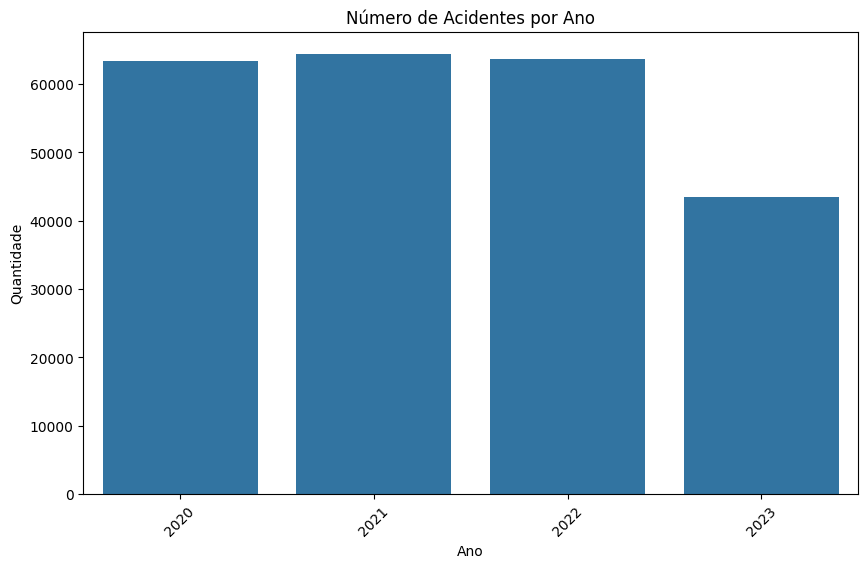

In [80]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='data_inversa', order=sorted(df['data_inversa'].unique()))
plt.title('Número de Acidentes por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

In [81]:
df['causa_acidente'].unique()

array(['Falta de Atenção à Condução', 'Condutor Dormindo',
       'Não guardar distância de segurança', 'Velocidade Incompatível',
       'Defeito Mecânico no Veículo',
       'Desobediência às normas de trânsito pelo condutor',
       'Ultrapassagem Indevida', 'Pista Escorregadia',
       'Ingestão de Álcool', 'Mal Súbito',
       'Carga excessiva e/ou mal acondicionada', 'Agressão Externa',
       'Falta de Atenção do Pedestre', 'Animais na Pista',
       'Defeito na Via', 'Avarias e/ou desgaste excessivo no pneu',
       'Desobediência às normas de trânsito pelo pedestre',
       'Fenômenos da Natureza', 'Restrição de Visibilidade',
       'Objeto estático sobre o leito carroçável',
       'Ingestão de álcool e/ou substâncias psicoativas pelo pedestre',
       'Ingestão de Substâncias Psicoativas',
       'Deficiência ou não Acionamento do Sistema de Iluminação/Sinalização do Veículo',
       'Sinalização da via insuficiente ou inadequada',
       'Ausência de reação do condutor',
 

In [82]:
df[df['causa_acidente'] == 'Condutor Dormindo'].shape[0]

7873

In [83]:
condutor_dormindo = df[df['causa_acidente'] == 'Condutor Dormindo']

In [84]:
condutor_dormindo

,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,...,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia
226457,2020,quarta-feira,6h às 12h,BA,116.0,191,CANUDOS,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Fatais,...,0,0,0,0,0,1,-10.320020,-39.06425,SPRF-BA,DEL07-BA
226459,2020,quarta-feira,12h às 18h,MG,262.0,"380,9",JUATUBA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,...,1,0,0,0,1,1,-19.947860,-44.38123,SPRF-MG,DEL01-MG
226469,2020,quinta-feira,0h às 6h,SP,116.0,"407,1",JUQUIA,Condutor Dormindo,Colisão com objeto estático,Com Vítimas Feridas,...,0,1,0,0,1,1,-24.326890,-47.56570,SPRF-SP,DEL05-SP
226472,2020,quinta-feira,6h às 12h,SP,153.0,"287,9",OCAUCU,Condutor Dormindo,Colisão frontal,Com Vítimas Fatais,...,1,0,1,0,1,2,-22.473080,-49.88806,SPRF-SP,DEL07-SP
226478,2020,quinta-feira,12h às 18h,RS,386.0,"373,7",TAQUARI,Condutor Dormindo,Colisão traseira,Com Vítimas Feridas,...,1,0,1,0,1,2,-29.610330,-51.80436,SPRF-RS,DEL04-RS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462907,2023,quinta-feira,6h às 12h,BA,101.0,98,ALAGOINHAS,Condutor Dormindo,Saída de leito carroçável,Sem Vítimas,...,0,0,2,0,0,1,-12.123950,-38.39300,SPRF-BA,DEL01-BA
462908,2023,quinta-feira,6h às 12h,PB,101.0,55,SANTA RITA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,...,1,0,0,0,1,1,-6.961933,-35.08636,SPRF-PB,DEL01-PB
462952,2023,quinta-feira,12h às 18h,PB,361.0,78,PIANCO,Condutor Dormindo,Colisão frontal,Com Vítimas Feridas,...,0,2,1,0,2,2,-7.185524,-37.87719,SPRF-PB,DEL03-PB
463024,2023,segunda-feira,12h às 18h,RS,116.0,"387,2",ARAMBARE,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,...,0,1,0,0,1,1,-30.812570,-51.69204,SPRF-RS,DEL02-RS


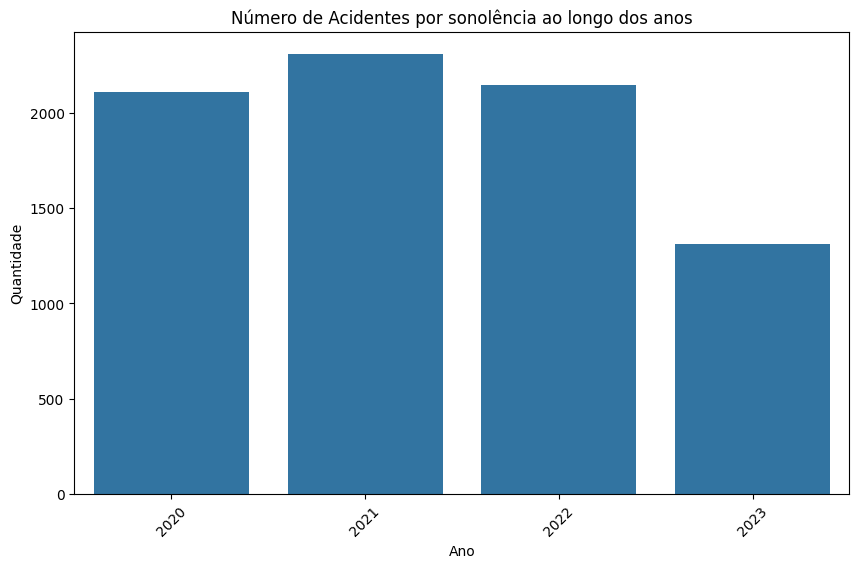

In [85]:
plt.figure(figsize=(10, 6))
sns.countplot(data=condutor_dormindo, x='data_inversa', order=sorted(df['data_inversa'].unique()))
plt.title('Número de Acidentes por sonolência ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

In [86]:
df[(df['causa_acidente'] == 'Condutor Dormindo') & (df['data_inversa'] == 2023)].shape[0]

1311

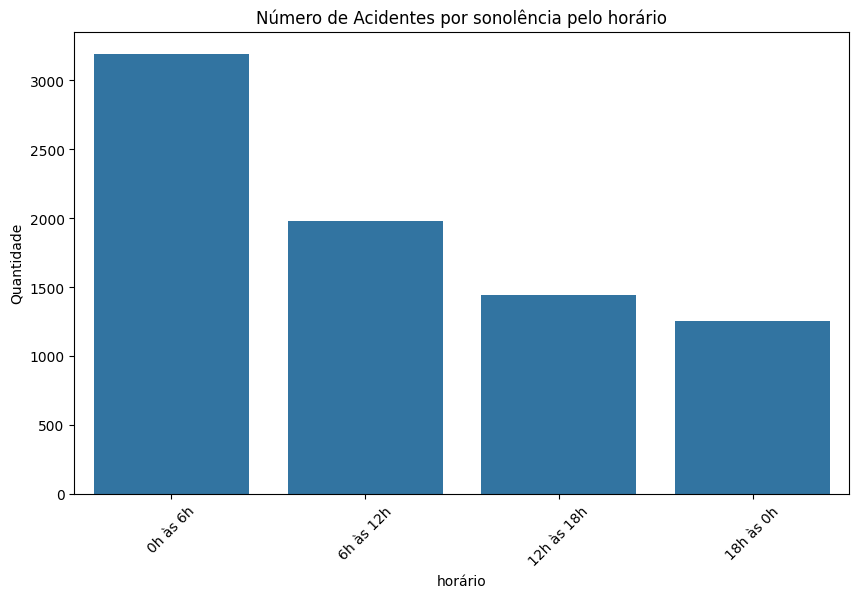

In [87]:
#fase_dia
plt.figure(figsize=(10, 6))
sns.countplot(data=condutor_dormindo, x='horario', order=condutor_dormindo['horario'].value_counts().index)
plt.title('Número de Acidentes por sonolência pelo horário')
plt.xlabel('horário')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

In [88]:
acidente_por_conta_sinalizacao = df[df['causa_acidente'] == 'Iluminação deficiente']

In [89]:
acidente_por_conta_sinalizacao

,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,...,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia
289729,2020,segunda-feira,18h às 0h,PE,232.0,413,SERRA TALHADA,Iluminação deficiente,Queda de ocupante de veículo,Sem Vítimas,...,0,0,0,1,0,1,-7.985958,-38.32484,SPRF-PE,DEL04-PE
289894,2020,sábado,0h às 6h,GO,40.0,96,CRISTALINA,Iluminação deficiente,Colisão traseira,Sem Vítimas,...,0,0,2,0,0,1,-16.782310,-47.59140,SPRF-DF,DEL01-DF
290284,2021,sexta-feira,18h às 0h,MS,158.0,"176,6",APARECIDA DO TABOADO,Iluminação deficiente,Colisão com objeto,Sem Vítimas,...,0,0,2,2,0,2,-20.235760,-51.33194,SPRF-MS,DEL08-MS
290480,2021,quinta-feira,0h às 6h,BA,242.0,"771,5",BARREIRAS,Iluminação deficiente,Atropelamento de Pedestre,Com Vítimas Fatais,...,0,0,0,1,0,1,-12.156550,-44.83677,SPRF-BA,DEL10-BA
290991,2021,segunda-feira,18h às 0h,ES,262.0,"21,3",VIANA,Iluminação deficiente,Atropelamento de Animal,Sem Vítimas,...,0,0,1,2,0,1,-20.380540,-40.50498,SPRF-ES,DEL01-ES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459959,2023,sexta-feira,18h às 0h,PR,277.0,721,FOZ DO IGUACU,Iluminação deficiente,Atropelamento de Pedestre,Com Vítimas Feridas,...,0,2,0,0,2,1,-25.491150,-54.51185,SPRF-PR,DEL05-PR
460483,2023,sábado,18h às 0h,BA,101.0,99,ALAGOINHAS,Iluminação deficiente,Colisão com objeto,Com Vítimas Feridas,...,3,0,0,0,3,2,-12.132930,-38.39227,SPRF-BA,DEL01-BA
462071,2023,quinta-feira,18h às 0h,MG,40.0,"483,8",SETE LAGOAS,Iluminação deficiente,Atropelamento de Pedestre,Com Vítimas Fatais,...,0,0,0,1,0,1,-19.571360,-44.23235,SPRF-MG,DEL02-MG
462540,2023,domingo,18h às 0h,GO,153.0,503,GOIANIA,Iluminação deficiente,Atropelamento de Pedestre,Com Vítimas Fatais,...,0,0,1,0,0,1,-16.731080,-49.24341,SPRF-GO,DEL01-GO


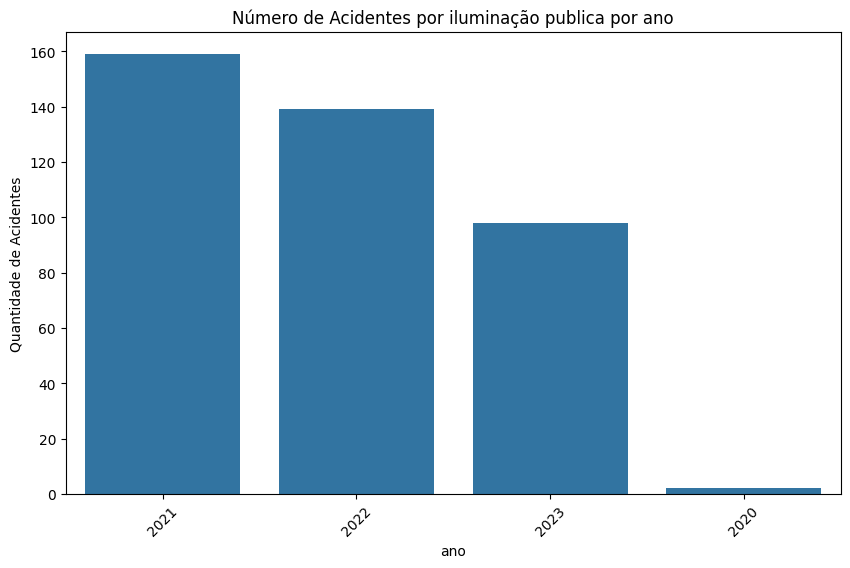

In [90]:
plt.figure(figsize=(10, 6))
sns.countplot(data=acidente_por_conta_sinalizacao, x='data_inversa', order=acidente_por_conta_sinalizacao['data_inversa'].value_counts().index)
plt.title('Número de Acidentes por iluminação publica por ano')
plt.xlabel('ano')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(rotation=45)
plt.show()

In [91]:
contagem_causas = df['causa_acidente'].value_counts()

In [92]:
contagem_causas

,count
causa_acidente,
Falta de Atenção à Condução,22356
Reação tardia ou ineficiente do condutor,21547
Velocidade Incompatível,20304
Ausência de reação do condutor,19011
Acessar a via sem observar a presença dos outros veículos,14806
...,...
Sinalização encoberta,10
Obstrução Via tentativa Assalto,10
Transtornos Mentais (exceto suicidio),6


In [93]:
contagem_causas_filtradas = contagem_causas[contagem_causas > 10000]

In [94]:
contagem_causas_filtradas

,count
causa_acidente,
Falta de Atenção à Condução,22356
Reação tardia ou ineficiente do condutor,21547
Velocidade Incompatível,20304
Ausência de reação do condutor,19011
Acessar a via sem observar a presença dos outros veículos,14806
Condutor deixou de manter distância do veículo da frente,12167
Ingestão de álcool pelo condutor,11108


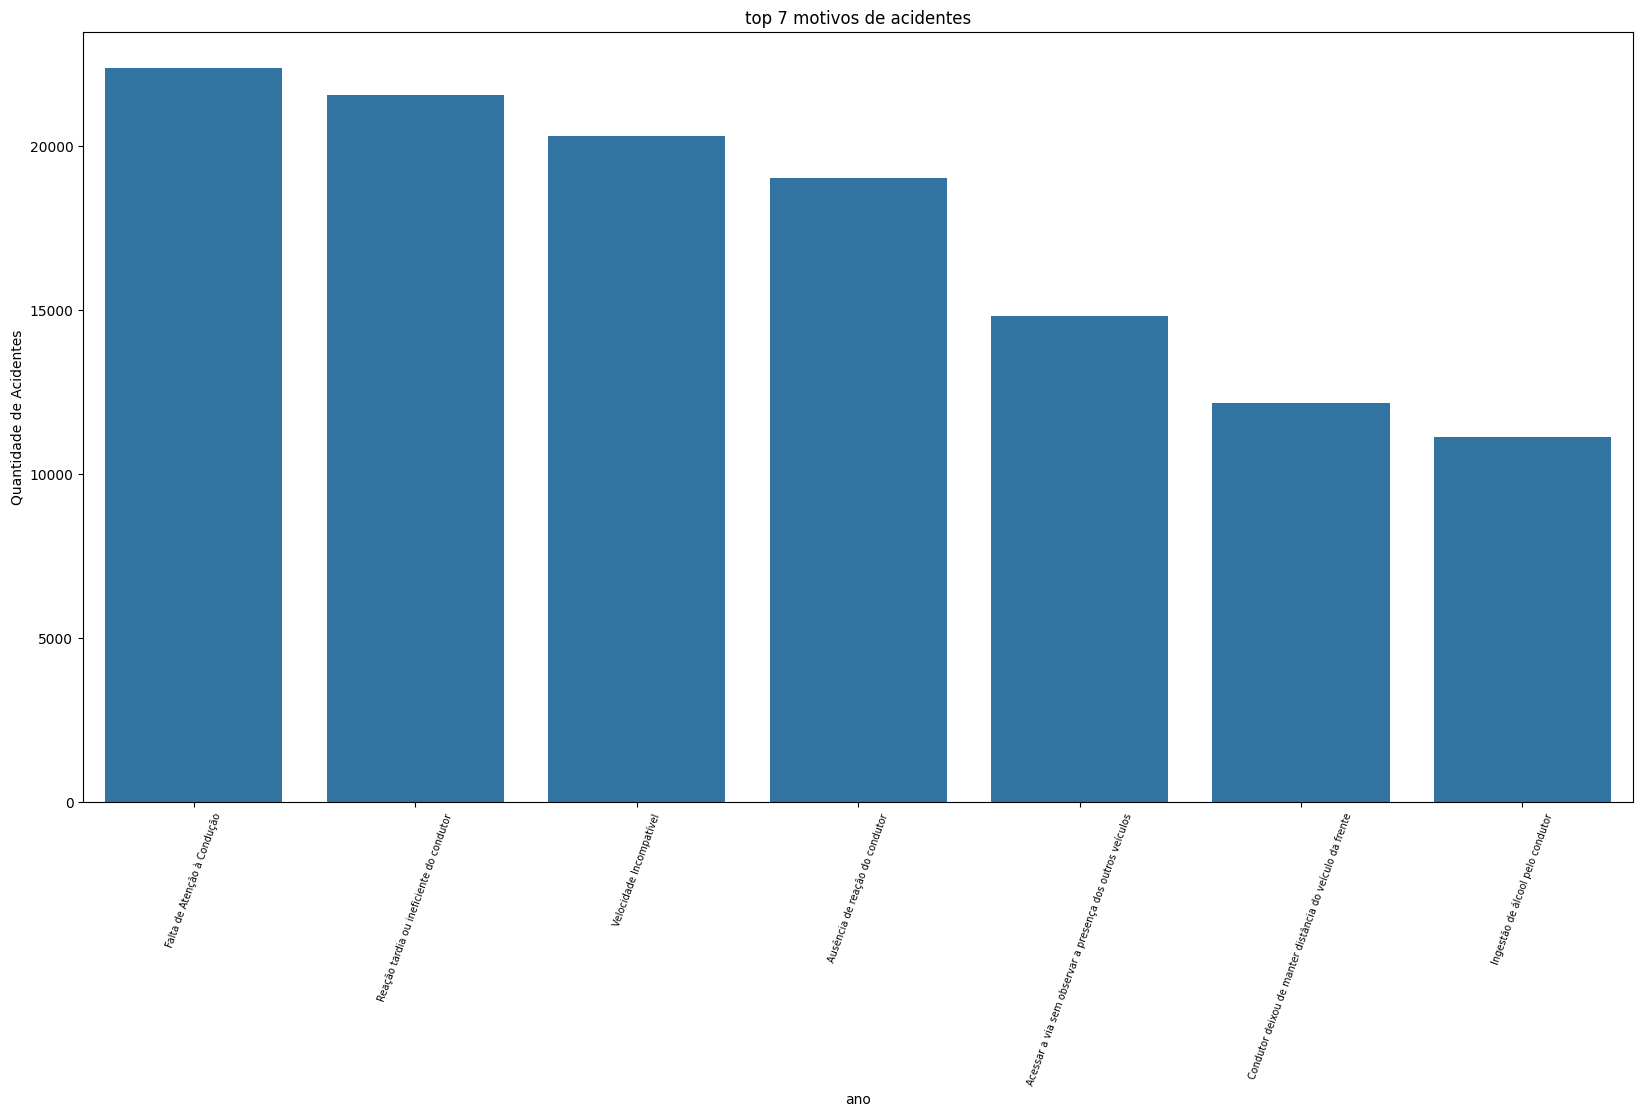

In [101]:
plt.figure(figsize=(20, 10))
sns.barplot(x=contagem_causas_filtradas.index, y=contagem_causas_filtradas.values)
plt.title('top 7 motivos de acidentes')
plt.xlabel('ano')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(rotation=70, fontsize=7)
plt.show()

In [96]:
acidente_por_desatencao = df[df['causa_acidente'] == 'Falta de Atenção à Condução']

In [97]:
acidente_por_desatencao.shape

(22356, 27)

In [98]:
acidente_por_desatencao[(acidente_por_desatencao['mortos'] > 0) | (acidente_por_desatencao['feridos_graves'] > 0)].shape

(5609, 27)

In [99]:
# df.to_excel('acidentes_transito.xlsx', index=False)